#### Q1. Why is it important to scale the inputs when using SVMs? (Use any data, e.g Iris)

For machine learning algorithms it is standard to make each dimension/ feature have zero mean and unit variance. The main advantage of scaling is to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. 

SVM constructs a hyperplane such that it has the largest distance to the nearest data points (support vectors). If the dimensions have different ranges, the dimension with much bigger range of values influences the distance more than other dimensions. This makes it important to scale the features such that all the features have similar importance when calculating the distance for construting the hyperplane. For e.g. if dimension 1 is from 0-1500 and dimension 2 is from 0-2, then dimension 1 becomes much more important than dimension 2, which will skew the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler

%matplotlib inline
# importing the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Number of observations ::", X.shape[0])
print("Number of features ::", X.shape[1])

Number of observations :: 150
Number of features :: 4


In [2]:
# let's consider just the two features for the ease of visualizations
X = iris.data[:, :2]
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Scaled Data')

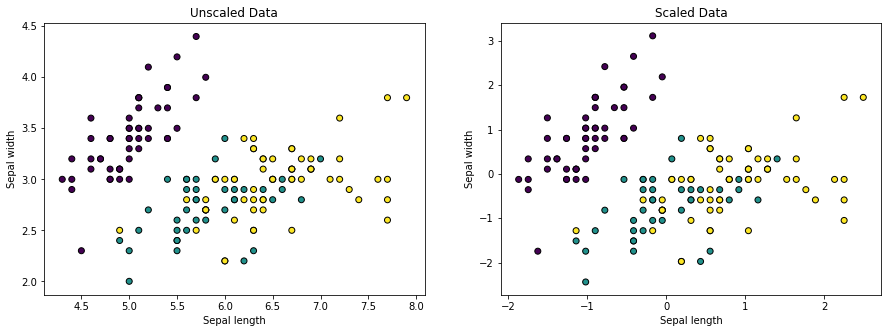

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Unscaled Data')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scaled Data')

#### In the case of iris dataset we may get away even without scaling the dataset. This is because the features are already on the same scale, both are order 1, as can be seen in the figure above. After trying with the scaled and unscaled dataset the classifier seemed to perform better for the case of the orginal data (it is important to note that I am just using the first two features for the purpose of demonstration which results in the sepal length and width being on the same scale. This is done for the ease of plotting and analyzing results)

In [5]:
# This is a helper function to plot the results of svm classification based on the specified parameter passed
def plotSVC(title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()

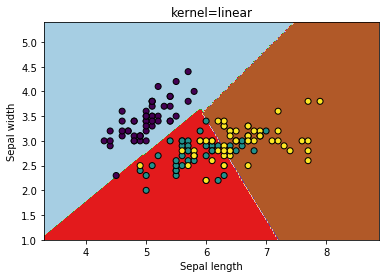

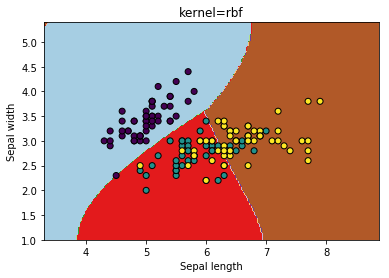

In [6]:
kernels = ['linear', 'rbf']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))

#### Q2. How can an SVM classifier output a confidence score when it classifies an instance? demonstrate with a block of code.

We will first build SVM classifier. From the figures above We can see that the datapoints can be divided into three classes. Given a datapoint let us say we want to predict which class it belongs to. We can do this using the following code:

In [7]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X, y)
classifier.predict(X[0].reshape(1, -1))

array([0])

#### Datapoint X[0] belongs to class 0. Instead of X[0] we could pass any other datapoiny or a new datapoint

We can use 'predict_proba' to calculate the probability of the datapoint belonging to all the various classes instead. This does so by computing the probability that a given datapoint belongs to a certain class using Platt scaling.  

In this case We need to train the SVM like before and we also need to train a probability model on top of of it by specifying that 'probability = True'. 

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', probability=True)
classifier.fit(X, y)
classifier.predict_proba(X[0].reshape(1, -1))

array([[0.96281232, 0.02145255, 0.01573513]])

#### The classifier is 96 % sure that it belongs to class 0 and 0.2 % sure that it belongs to class 1 and class 2. So instead of the resultant class it provides us the probabilities associated with each class for a given datapoint.

#### Q3. If you train an SVM classifier with an RBF Kernel and you find out that it underfits the training set. Should you increase/ decrease the gamma? What about C? write a code to prove your statement.

The gamma parameters represents the inverse of the radius of influence of samples selected by the model as support vectors. 

When gamma is small, the kernel function has small support region. This will only affects the samples which are very close to the support vectors in kernel space. The SVM will treat most samples in the training set as support vectors meaning that the support vector and the neighbours are classified correctly. However, when we apply the model to the test data, only the observations in the neighborhood of support vectors is classified correctly. Thus test error is high. This is the case of overfitting.

When gamma is large, the kernel function has large support region. This will affects a large number of samples which are close to the support vectors in kernel space. The SVM will treat only some samples of in the training set as suppport vectors meaning that the neighborhood points may be very different from the SV. The neighbors can be predicted wrongly, resulting in higher errors on the train set. When applying these support vectors to the test set the test error will also be high. This is the case of underfitting.

#### Thus if the classifier is underfitting we should decrease the value of gamma!

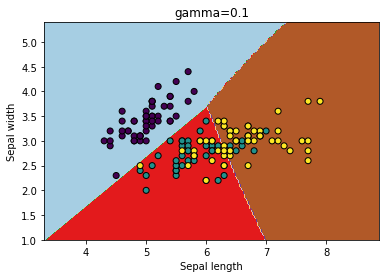

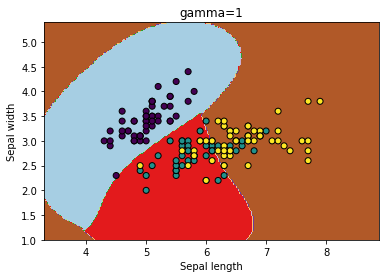

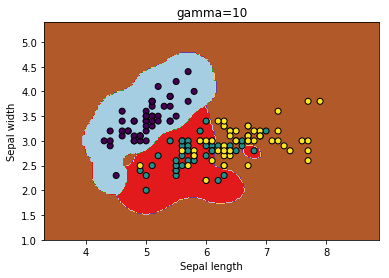

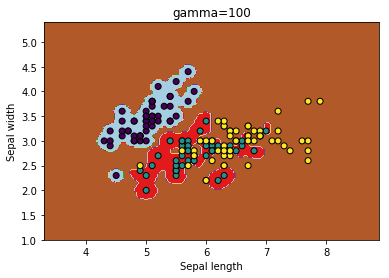

In [9]:
gamma_range = [0.1, 1, 10, 100]
for gamma in gamma_range:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

The Regularization parameter (also known as the C parameter) tells the SVM optimization how much we want to avoid misclassifying for each training example. 

For large values of C, the optimization will choose a smaller margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 

A small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies significantly more points.

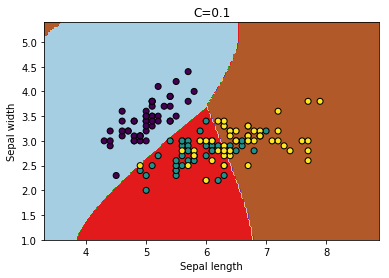

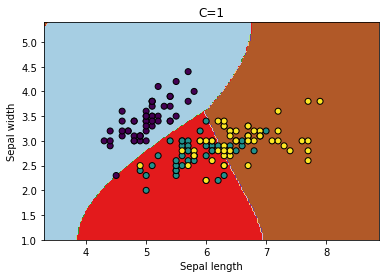

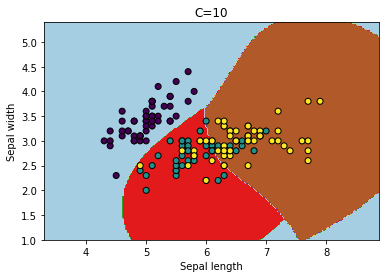

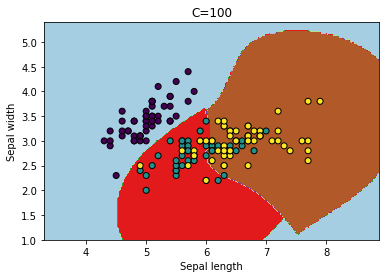

In [10]:
c_range = [0.1, 1, 10, 100]
for c in c_range:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

#### Q4. How can you train a SVM regressor on a sample data?

Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane. Kernel parameters selects the type of hyperplane used to separate the data. Using 'linear' will use a linear hyperplane. 'rbf' uses a non linear hyper-plane.

gamma is a one of the parameters for the hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data. Decreasing the value of gamma leads to underfitting 

C is the penalty parameter of the error term. It is the regularization parameter which tells the SVM optimization as to how much we want to avoid misclassifying for the training example. It controls the trade off between smooth decision boundary and classifying the training points correctly. Increasing C values leads to overfitting the training data.

For the sake of simplicity we will tune just the two parameter for rbf kernel, gamma and C, to find the optimal values for the best SVM performance.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import LinearSVC

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train,y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVC on training set: 0.80
Accuracy of SVC on test set: 0.90


In [13]:
from sklearn.model_selection import GridSearchCV

gamma_range = [0.1, 1, 10, 100, 1000]
c_range = [0.1, 1, 10, 100, 1000]
param_grid = dict(gamma=gamma_range, C=c_range)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
print('Accuracy of SVC on test set: {:.2f}'.format(grid.score(X_test, y_test)))

The best parameters are {'C': 0.1, 'gamma': 1} with a score of 0.83
Accuracy of SVC on test set: 0.90
